## Heart Disease Analysis

**Introduction**

Heart disease refers to conditions that affect the regular functions of the heart, stemming from several root causes. With the most common cause being decreased blood flow to the heart- coronary artery disease(CAD), leading to heart attacks. Many factors, including medical conditions promote higher risks of heart diseases, some can’t be controlled, such as sex, age, family and medical history, and heritage. Medical conditions including high blood pressure, diabetes, sleep apnea, and lifestyle risks such as long term unhealthy diets, not enough physical activities, overuse of tobacco and alcohol, stress, etc., can all lead to a higher risk of heart diseases. Symptoms can also be indications of a potential heart disease, including chest pains or chest discomfort, discomfort in the jaw, neck, shoulders areas, weak, light-headed feelings, shortness of breath, and the signs should be alerted for. 

Heart diseases are classified based on many elements, including chest pain types. In this analysis, we will be predicting the type of chest pain based on age, resting blood pressure, serum cholesterol level, and maximum heart rate achieved, using the dataset containing the Hungarian heart disease patients’ medical conditions. 


In [2]:
library(tidyverse)
library(dplyr)
library(readr)
library(tidymodels) 

In [1]:
#reading the file from the download url, then adding column names based on the data's webpage's specifications
heart_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data")
colnames(heart_data) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
# adding the lost row of information to the dataset and converting varieties to factor
head(heart_data)

ERROR: Error in read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"): could not find function "read_csv"


In [4]:
#adding in the missing row of data that got wiped when they were replaced with column names
heart_data[nrow(heart_data) + 1,] = list(28, 1, 2, "130", "132", "0", "2", "185", "0", 0, "?", "?", "?", 0)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
30,0,1,170,237,0,1,170,0,0,?,?,6,0
31,0,2,100,219,0,1,150,0,0,?,?,?,0
32,0,2,105,198,0,0,165,0,0,?,?,?,0
32,1,2,110,225,0,0,184,0,0,?,?,?,0


In [5]:
# converting the "?" to NA
heart_data$trestbps <- gsub("?", NA, heart_data$trestbps, fixed = TRUE)
heart_data$chol <- gsub("?", NA, heart_data$chol, fixed = TRUE)
heart_data$fbs <- gsub("?", NA, heart_data$fbs, fixed = TRUE)
heart_data$restecg <- gsub("?", NA, heart_data$restecg, fixed = TRUE)
heart_data$thalach <- gsub("?", NA, heart_data$thalach, fixed = TRUE)
heart_data$exang <- gsub("?", NA, heart_data$exang, fixed = TRUE)
heart_data$slope <- gsub("?", NA, heart_data$slope, fixed = TRUE)
heart_data$ca <- gsub("?", NA, heart_data$ca, fixed = TRUE)
heart_data$thal <- gsub("?", NA, heart_data$thal, fixed = TRUE)
head(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0


In [6]:
#converting all chr columns to dbl columns
heart_data_clean <- heart_data %>% 
                        mutate(trestbps = as.numeric(trestbps)) %>% 
                        mutate(chol = as.numeric(chol)) %>% 
                        mutate(fbs = as.numeric(fbs)) %>% 
                        mutate(restecg = as.numeric(restecg)) %>% 
                        mutate(thalach = as.numeric(thalach)) %>% 
                        mutate(exang = as.numeric(exang)) %>% 
                        mutate(slope = as.numeric(slope)) %>% 
                        mutate(ca = as.numeric(ca)) %>% 
                        mutate(thal = as.numeric(thal)) 
head(heart_data_clean)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
30,0,1,170,237,0,1,170,0,0,NA,NA,6,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
32,1,2,110,225,0,0,184,0,0,NA,NA,NA,0


In [7]:
write_csv(heart_data_clean, "heart_data_clean.csv")

In [8]:
heart_data_fct <- heart_data_clean %>% 
                    mutate(sex = factor(sex, labels = c("female", "male"))) %>% #1 = male; 0 = female
                    mutate(cp = factor(cp, labels = c("typical angina", "atypical angina", "non-anginal pain", "asymptomatic"))) %>% #chest pain type -- 1: typical angina -- 2: atypical angina -- 3: non-anginal pain -- 4: asymptomatic
                    mutate(fbs = factor(fbs, labels = c("false", "true"))) %>% #if fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
                    mutate(restecg = factor(restecg, labels = c("normal", "abnormality", "hypertrophy"))) %>% #resting electrocardiographic results -- 0: normal -- 1: ST-T wave abnormality -- 2: probable or definite left ventricular hypertrophy
                    mutate(exang = factor(exang, labels = c("no", "yes"))) %>% #exercise induced angina (1 = yes; 0 = no)
                    mutate(slope = factor(slope, labels = c("upsloping", "flat", "downsloping"))) %>% #11. #41 (slope) the slope of the peak exercise ST segment -- 1 : upsloping -- 2: flat -- 3: downsloping
                    mutate(thal = factor(thal, labels = c("normal", "fixed", "reversible"))) %>% #3 = normal; 6 = fixed defect; 7 = reversable defect
                    mutate(num = factor(num, labels = c("less than 50", "more than 50"))) #diagnosis of heart disease (angiographic disease status) -- 0: < 50% diameter narrowing -- 1: > 50% diameter narrowing

colnames(heart_data_fct) = c("age", "sex", "chest_pain", "resting_pressure", "serum_chol", "fasting_blood_sugar", "resting_ecg", "max_heartrate", "exercise_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_data_fct

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
29,male,atypical angina,120,243,false,normal,160,no,0,NA,NA,NA,less than 50
29,male,atypical angina,140,NA,false,normal,170,no,0,NA,NA,NA,less than 50
30,female,typical angina,170,237,false,abnormality,170,no,0,NA,NA,fixed,less than 50
31,female,atypical angina,100,219,false,abnormality,150,no,0,NA,NA,NA,less than 50
32,female,atypical angina,105,198,false,normal,165,no,0,NA,NA,NA,less than 50
32,male,atypical angina,110,225,false,normal,184,no,0,NA,NA,NA,less than 50
32,male,atypical angina,125,254,false,normal,155,no,0,NA,NA,NA,less than 50
33,male,non-anginal pain,120,298,false,normal,185,no,0,NA,NA,NA,less than 50
34,female,atypical angina,130,161,false,normal,190,no,0,NA,NA,NA,less than 50


In [9]:
write_csv(heart_data_fct, "heart_data_fct.csv")

In [10]:
set.seed(9999)

In [11]:
#Split the data into training set and test set

heart_data_split <- initial_split(heart_data_fct, prop = 0.75, strata = chest_pain)
training_heart_data <- training(heart_data_split)
testing_heart_data <- testing(heart_data_split)
training_heart_data

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
29,male,atypical angina,120,243,false,normal,160,no,0,NA,NA,NA,less than 50
30,female,typical angina,170,237,false,abnormality,170,no,0,NA,NA,fixed,less than 50
31,female,atypical angina,100,219,false,abnormality,150,no,0,NA,NA,NA,less than 50
32,female,atypical angina,105,198,false,normal,165,no,0,NA,NA,NA,less than 50
32,male,atypical angina,110,225,false,normal,184,no,0,NA,NA,NA,less than 50
33,male,non-anginal pain,120,298,false,normal,185,no,0,NA,NA,NA,less than 50
34,female,atypical angina,130,161,false,normal,190,no,0,NA,NA,NA,less than 50
34,male,atypical angina,150,214,false,abnormality,168,no,0,NA,NA,NA,less than 50
34,male,atypical angina,98,220,false,normal,150,no,0,NA,NA,NA,less than 50


In [81]:
#Summarize training data
summary(training_heart_data)

avg_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(mean, na.rm = TRUE)
#Dataframe that contains: Average of all numerical variables

max_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(max, na.rm = TRUE)
#Dataframe that contains: Maximum of all numerical variables

min_training_heart_data <- training_heart_data %>%
                                 select(age, resting_pressure, serum_chol, max_heartrate, oldpeak, ca) %>%
                                 map_df(min, na.rm = TRUE)
#Dataframe that contains: Minimum of all numerical variables

      age            sex                 chest_pain resting_pressure
 Min.   :28.00   female: 66   typical angina  : 6   Min.   : 98.0   
 1st Qu.:41.00   male  :156   atypical angina :79   1st Qu.:120.0   
 Median :48.00                non-anginal pain:42   Median :130.0   
 Mean   :47.73                asymptomatic    :95   Mean   :132.5   
 3rd Qu.:54.00                                      3rd Qu.:140.0   
 Max.   :65.00                                      Max.   :200.0   
                                                                    
   serum_chol    fasting_blood_sugar      resting_ecg  max_heartrate
 Min.   : 85.0   false:198           normal     :180   Min.   : 90  
 1st Qu.:211.0   true : 16           abnormality: 37   1st Qu.:125  
 Median :246.0   NA's :  8           hypertrophy:  5   Median :140  
 Mean   :252.6                                         Mean   :140  
 3rd Qu.:284.0                                         3rd Qu.:155  
 Max.   :603.0                    

In [80]:
#Summarize numerical variables in a table

table_dbl <- rbind(avg_training_heart_data, max_training_heart_data, min_training_heart_data) 
df <- data.frame(summary = c('average','max','min'))
table_dbl <- cbind(df, table_dbl)
table_dbl

summary,age,resting_pressure,serum_chol,max_heartrate,oldpeak,ca
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
average,47.73423,132.473,252.5805,139.964,0.6216216,0
max,65.00000,200.000,603.0000,190.000,5.0000000,0
min,28.00000,98.000,85.0000,90.000,0.0000000,0


In [77]:
#Summarize number of observations of each categorical variable

num_obs_cp <- training_heart_data %>%
              group_by(chest_pain) %>%
              summarize(n = n())
num_obs_cp  

num_obs_sex <- training_heart_data %>%
              group_by(sex) %>%
              summarize(n = n())
num_obs_sex

num_obs_fasting_blood_sugar <- training_heart_data %>%
              group_by(fasting_blood_sugar) %>%
              summarize(n = n())
num_obs_fasting_blood_sugar

num_obs_resting_ecg <- training_heart_data %>%
              group_by(resting_ecg) %>%
              summarize(n = n())
num_obs_resting_ecg

num_obs_exercise_angina <- training_heart_data %>%
              group_by(exercise_angina) %>%
              summarize(n = n())
num_obs_exercise_angina

num_obs_slope <- training_heart_data %>%
              group_by(slope) %>%
              summarize(n = n())
num_obs_slope

num_obs_thal <- training_heart_data %>%
              group_by(thal) %>%
              summarize(n = n())
num_obs_thal

num_obs_num <- training_heart_data %>%
              group_by(num) %>%
              summarize(n = n())
num_obs_num

`summarise()` ungrouping output (override with `.groups` argument)



chest_pain,n
<fct>,<int>
typical angina,6
atypical angina,79
non-anginal pain,42
asymptomatic,95


`summarise()` ungrouping output (override with `.groups` argument)



sex,n
<fct>,<int>
female,66
male,156


`summarise()` ungrouping output (override with `.groups` argument)



fasting_blood_sugar,n
<fct>,<int>
false,198
true,16
NA,8


`summarise()` ungrouping output (override with `.groups` argument)



resting_ecg,n
<fct>,<int>
normal,180
abnormality,37
hypertrophy,5


`summarise()` ungrouping output (override with `.groups` argument)



exercise_angina,n
<fct>,<int>
no,153
yes,69


`summarise()` ungrouping output (override with `.groups` argument)



slope,n
<fct>,<int>
upsloping,9
flat,71
downsloping,1
NA,141


`summarise()` ungrouping output (override with `.groups` argument)



thal,n
<fct>,<int>
normal,5
fixed,7
reversible,8
NA,202


`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
less than 50,139
more than 50,83


In [78]:
#missing data

miss_obs_row <- nrow(na.omit(training_heart_data))
miss_obs_row 

miss_obs_column <- training_heart_data %>%
                   map_df(~sum(is.na(.)))
miss_obs_column

[1] 1

age,sex,chest_pain,resting_pressure,serum_chol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_angina,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,17,8,0,0,0,0,141,221,202,0


In [65]:
#Summarize number of observations of each category
#Should not use ca, slope, thal since most of the observations from these three variables have NAs.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



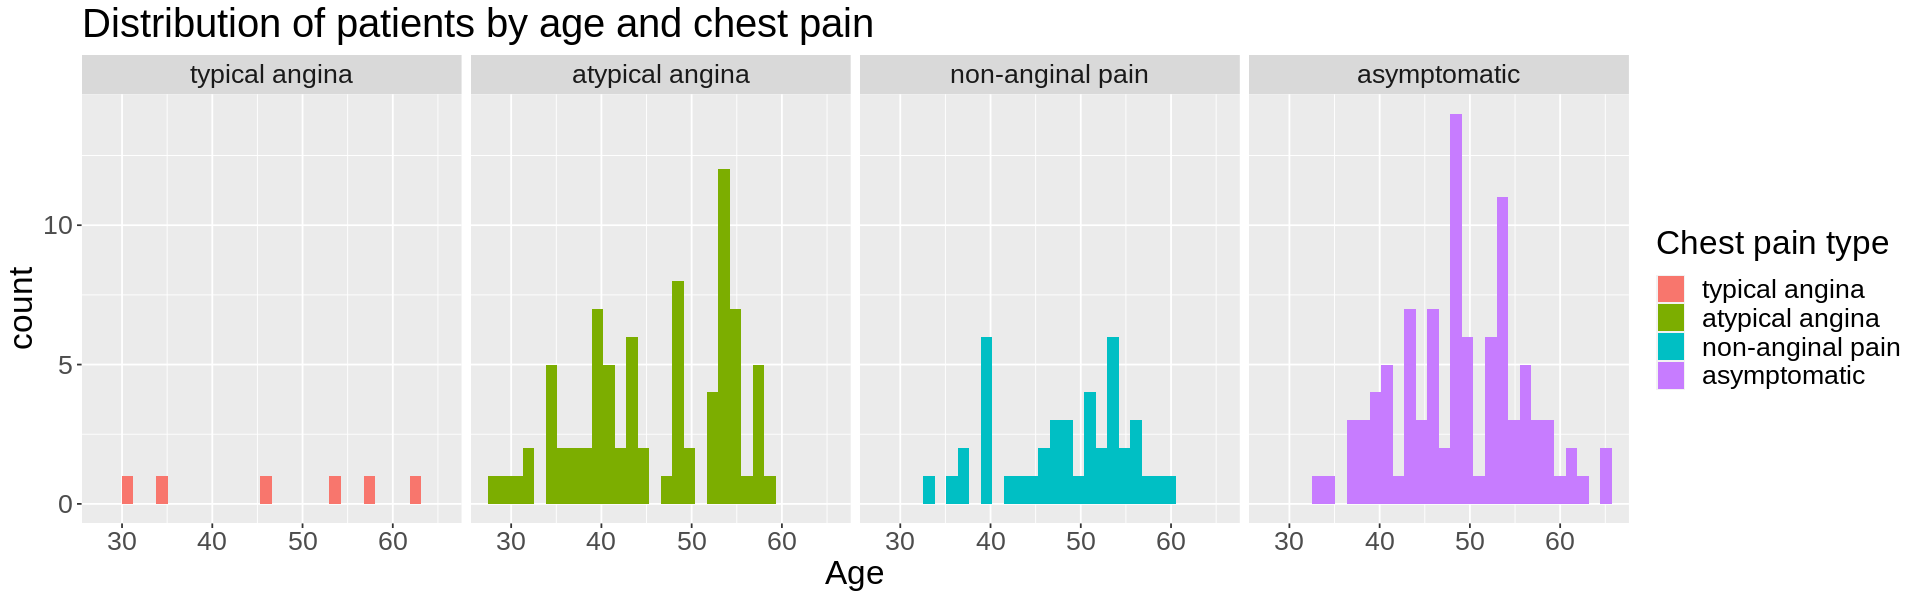

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 17 rows containing non-finite values (stat_bin).”


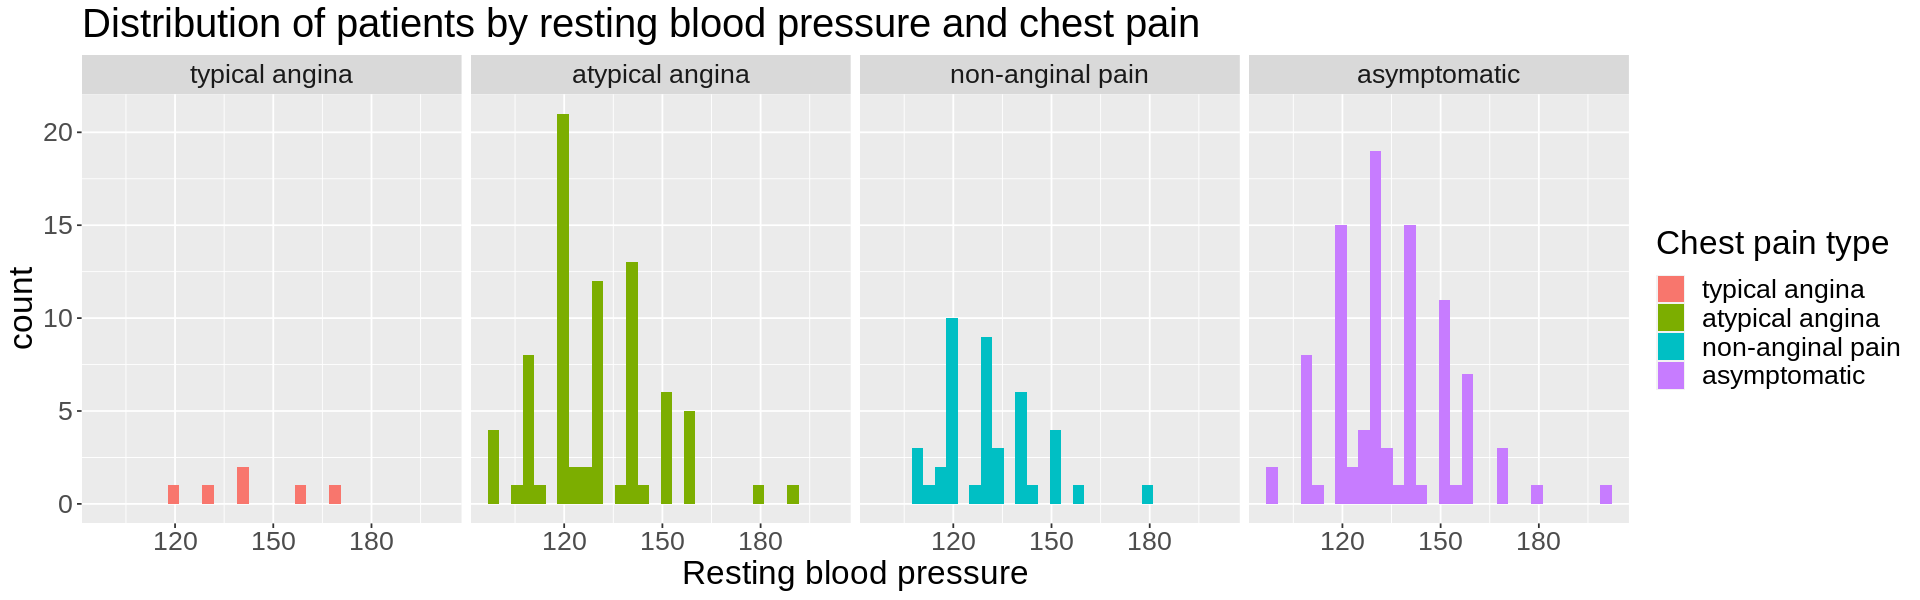

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



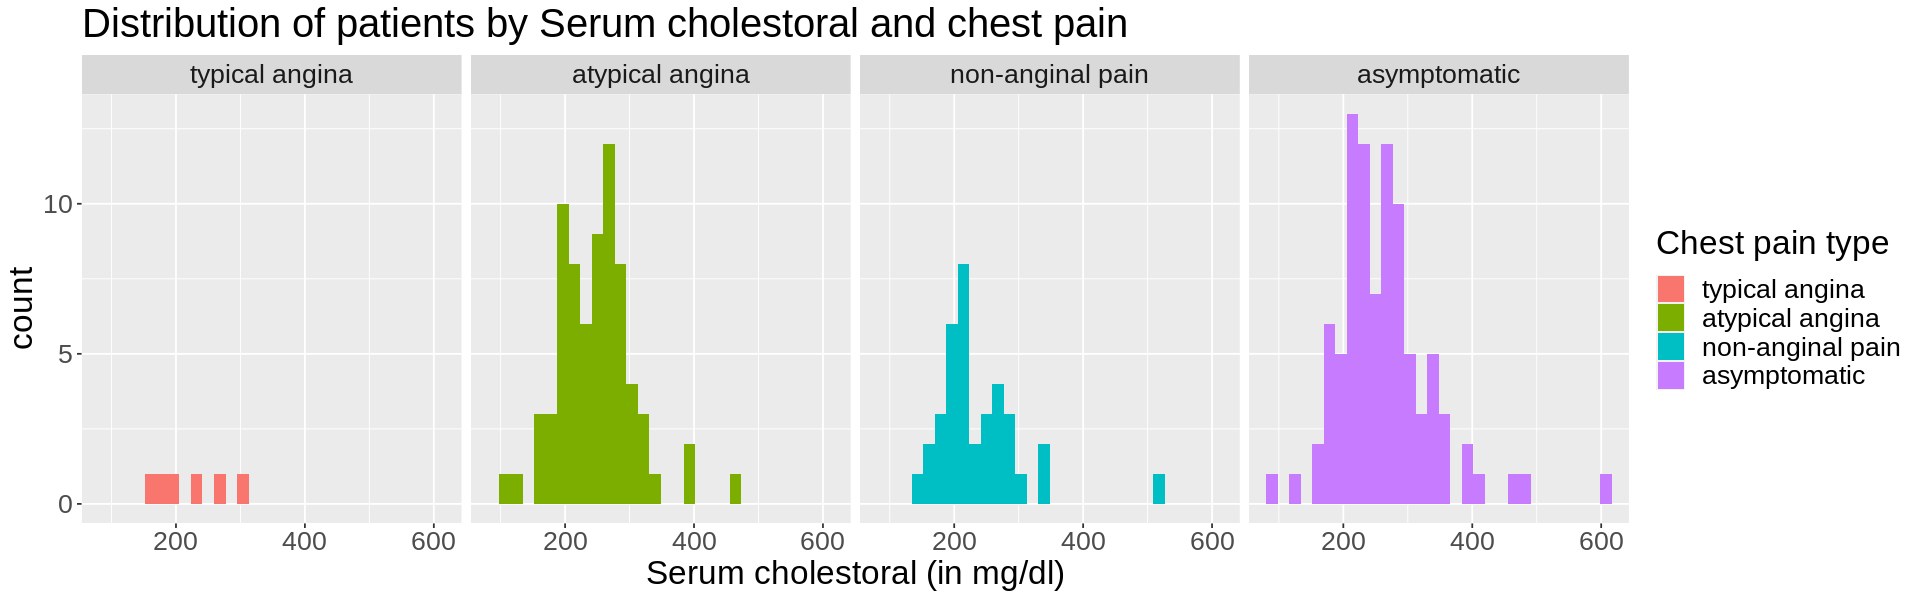

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



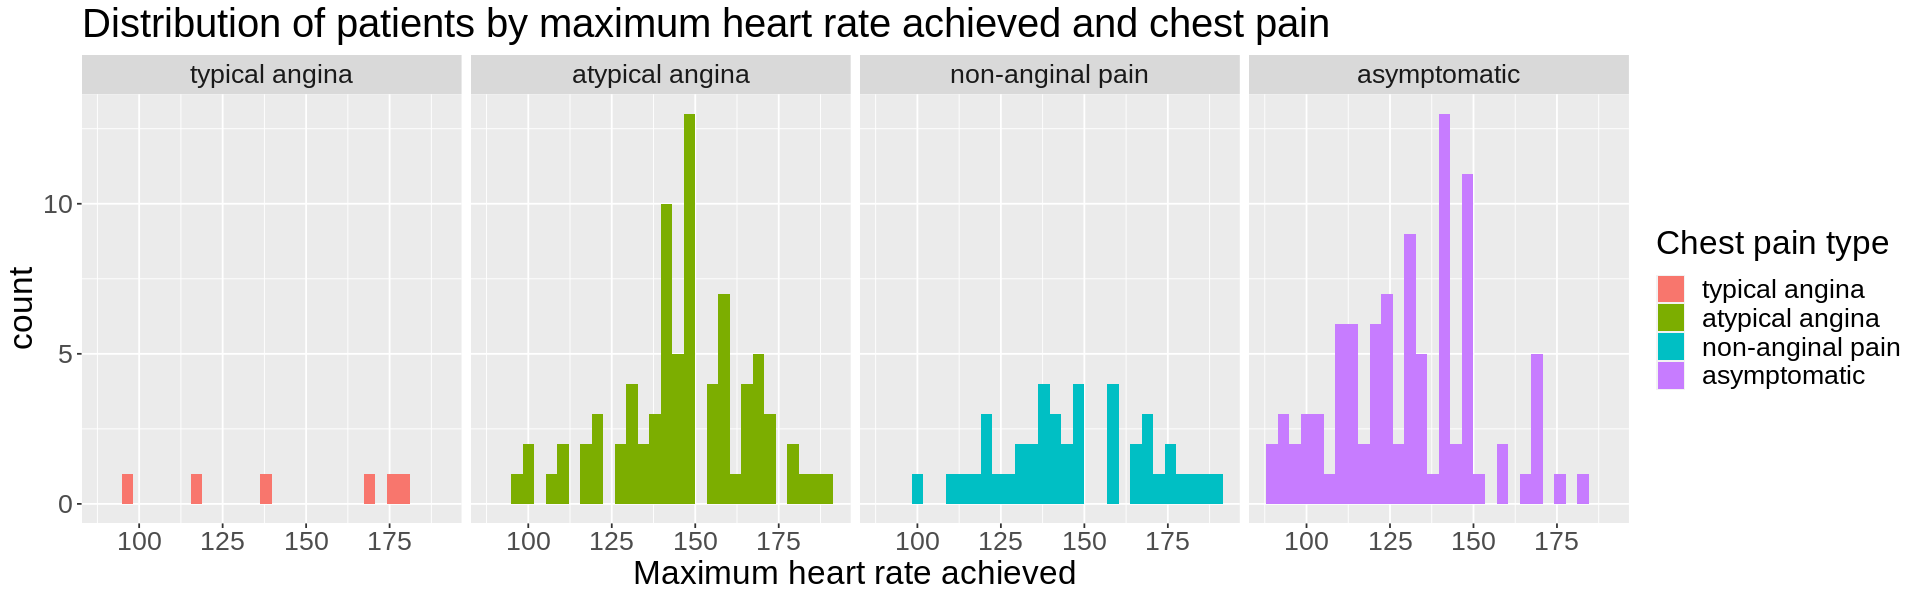

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 221 rows containing non-finite values (stat_bin).”


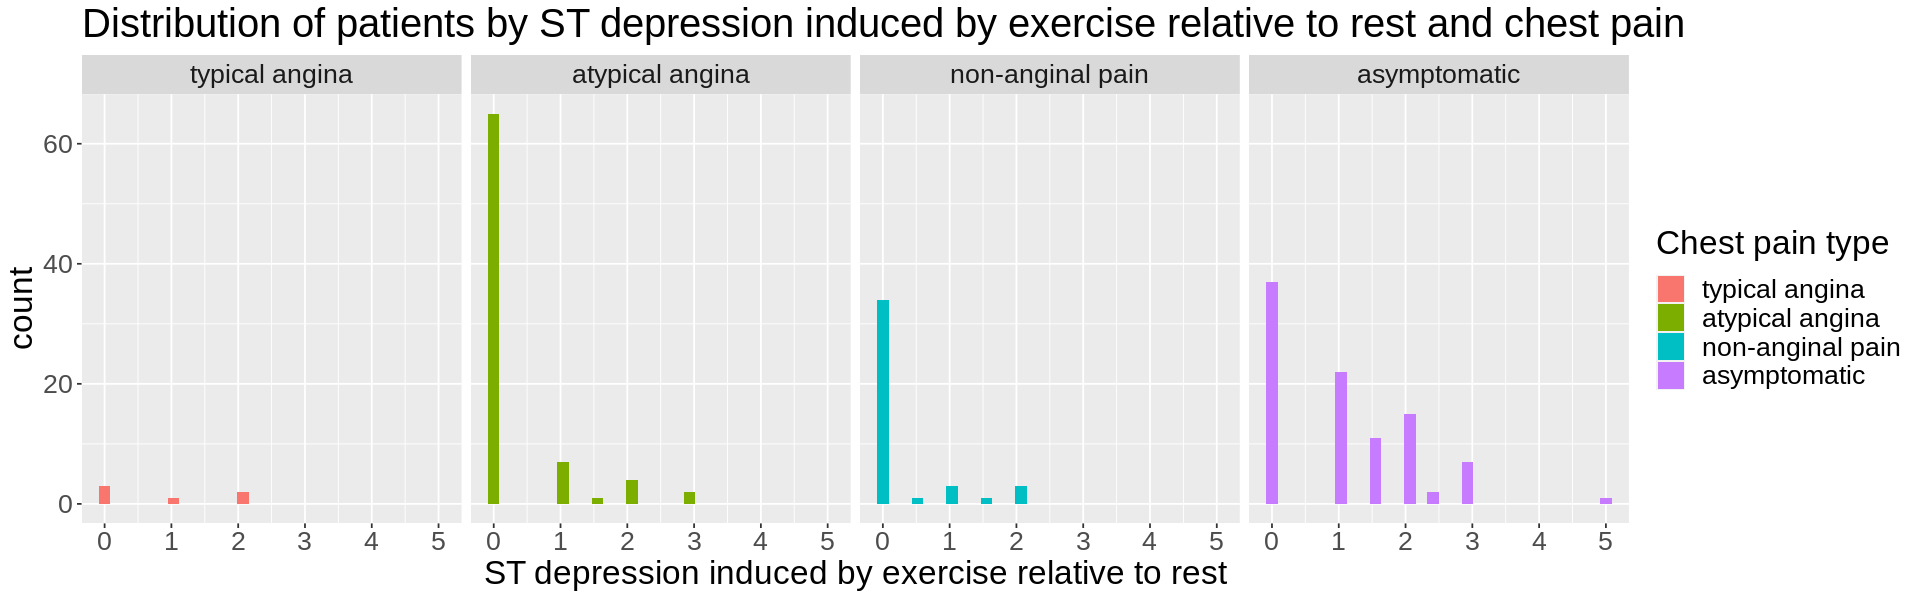

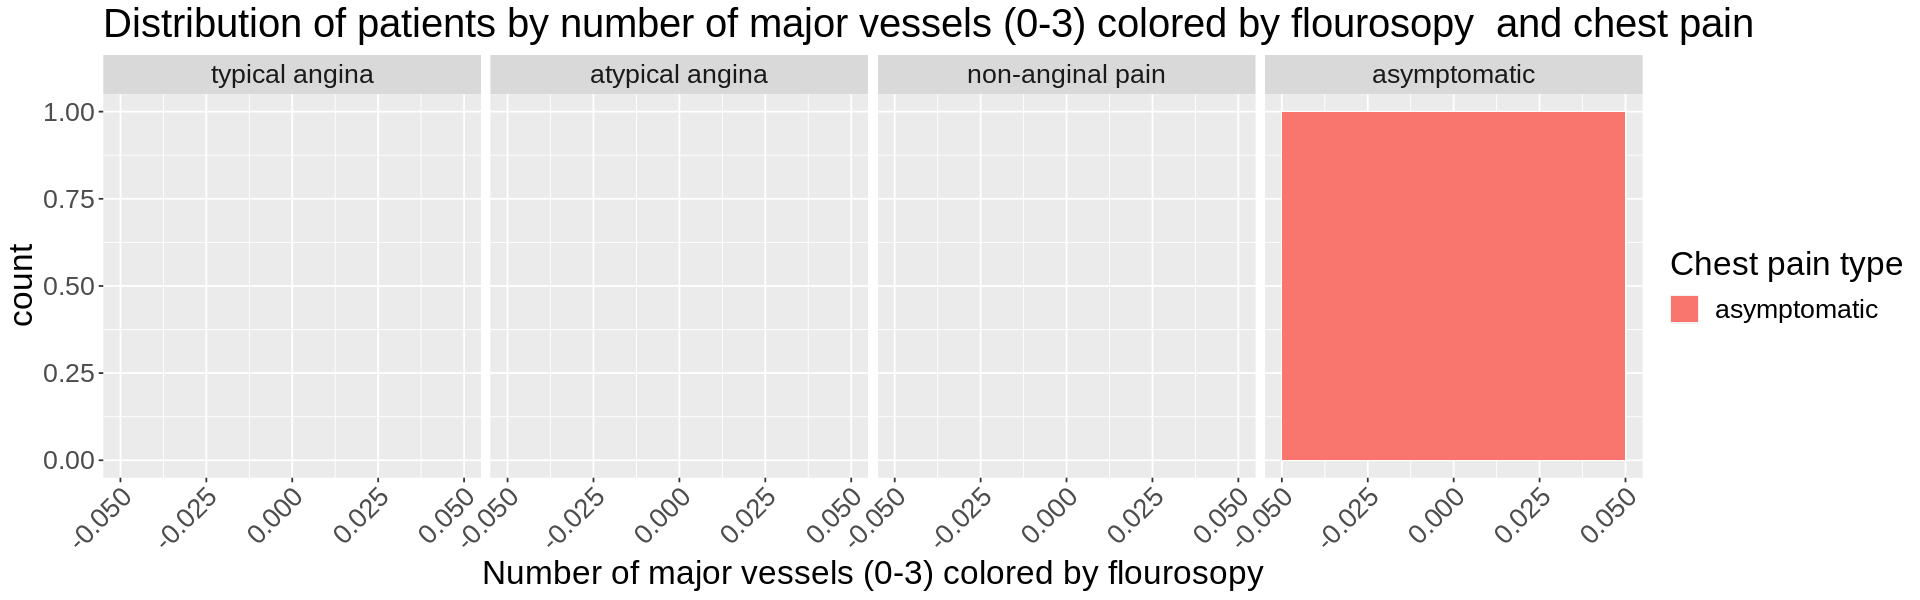

In [90]:
#Visualization, class is chest pain
options(repr.plot.height = 5, repr.plot.width = 16)

distribution_age_plot <- training_heart_data %>%
                         select(age, chest_pain) %>%
                         ggplot(aes(x = age, fill = chest_pain)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Age', fill = 'Chest pain type') +
                         ggtitle('Distribution of patients by age and chest pain') +
                         facet_grid(.~chest_pain) +
                         theme(text = element_text(size = 20))
                          
distribution_age_plot

distribution_rp_plot <- training_heart_data %>%
                         select(resting_pressure, chest_pain) %>%
                         ggplot(aes(x = resting_pressure, fill = chest_pain)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Resting blood pressure', fill = 'Chest pain type') +
                         ggtitle('Distribution of patients by resting blood pressure and chest pain') +
                         facet_grid(.~chest_pain) +
                         theme(text = element_text(size = 20))
distribution_rp_plot

distribution_sc_plot <- training_heart_data %>%
                         select(serum_chol, chest_pain) %>%
                         ggplot(aes(x = serum_chol, fill = chest_pain)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Serum cholestoral (in mg/dl)', fill = 'Chest pain type') +
                         ggtitle('Distribution of patients by Serum cholestoral and chest pain') +
                         facet_grid(.~chest_pain) +
                         theme(text = element_text(size = 20))
distribution_sc_plot

distribution_mhr_plot <- training_heart_data %>%
                         select(max_heartrate, chest_pain) %>%
                         ggplot(aes(x = max_heartrate, fill = chest_pain)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Maximum heart rate achieved', fill = 'Chest pain type') +
                         ggtitle('Distribution of patients by maximum heart rate achieved and chest pain') +
                         facet_grid(.~chest_pain) +
                         theme(text = element_text(size = 20))
distribution_mhr_plot

distribution_op_plot <- training_heart_data %>%
                         select(oldpeak, chest_pain) %>%
                         ggplot(aes(x = oldpeak, fill = chest_pain)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'ST depression induced by exercise relative to rest', fill = 'Chest pain type') +
                         ggtitle('Distribution of patients by ST depression induced by exercise relative to rest and chest pain') +
                         facet_grid(.~chest_pain) +
                         theme(text = element_text(size = 20))
distribution_op_plot

distribution_ca_plot <- training_heart_data %>%
                         select(ca, chest_pain) %>%
                         ggplot(aes(x = ca, fill = chest_pain)) +
                         geom_histogram(position = 'identity') +
                         labs(x = 'Number of major vessels (0-3) colored by flourosopy', fill = 'Chest pain type') +
                         ggtitle('Distribution of patients by number of major vessels (0-3) colored by flourosopy  and chest pain') +
                         facet_grid(.~chest_pain) +
                         theme(text = element_text(size = 20)) +
                         theme(axis.text.x = element_text (angle = 45, hjust = 1))
distribution_ca_plot

**Methods**

By selecting the chest pain (cp), age, resting blood pressure, serum cholesterol, and maximum heart rate achieved columns, we will be conducting a K-nearest neighbors classification model to predict chest pain type from different values of these variables. Through initially splitting the data into training and testing sets, completing the cross validation process, a value for K will be chosen to maximize validation accuracy to prevent overfitting/underfitting. K will be retrained using only the training set, and give a final prediction. The data will be visualized by utilizing a scatter plot with different colors/shapes to differentiate the various chest types, but also give the reader a general idea of how the prediction came to be, as they are also comparing the data point with its nearest neighbors. As well, workflows and tibbles will be used to represent numerical data and ensure the reader follows the steps and calculations used for the prediction. 



**Expected outcomes and significance**

From our analysis, we expect to predict the chest pain type based on age, resting blood pressure, serum cholesterol level, and maximum heart rate achieved. This finding is beneficial due to it being a major symptom in heart diseases and would assist in heart disease classification. Our analysis could possibly lead to questions such as will certain symptoms indicate heart diseases in certain populations(such as different age groups or sex), as well as are these the only factors to consider when diagnosing heart diseases.